# Mini-Project - Week 6 & 7
*Goal: To explore the 2016.csv dataset and present findings using data analysis and visualization techniques. In this mini-project, we will work with the dataset supplied and go through the data science process using the tools and techniques learned from Weeks 1 - 5. The aim is to potentially use these tools together to achieve the objective of data exploration.*

## 1 High Level View [2 pts]
- *Describe the dataset in words (50 words).*
- *Look at the data samples and describe what they represent and how they could be useful in a variety of data science tasks.*

> ### 1.1 Import Libraries and Set Plot Parameters

In [293]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# set matplotlib parameters
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 7]



> ### 1.2 Set Working Directory and Load Data

In [294]:
# set the working directory
os.chdir('/home/scotty/dsc_207_mini_project')

# load the data into a pandas dataframe
df = pd.read_csv('2016.csv')

> ### 1.3 Look at Data Samples

>> #### 1.3.1 First Five Rows of Data

In [295]:
# display the first 5 rows and all columns of the dataset using the pandas head method
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


> ### 1.4 Brief Data Description
> - Looking at the first five rows of data of the 2016.csv, we see that this dataset is ranking countries by happiness, and countries are grouped into different regions. Aside from happiness, this dataset gives us other metrics for each country: Economy, Family, Health, Freedom, Trust, Generosity, and Dystopia Residual.

## 2 Preliminary Exploration [4 pts]
- *Explore what is present in the data and how the data is organized.*
- *Answer the following questions using the pandas library and markdown cells to describe your actions:*
    - *Are there quality issues in the dataset (noisy, missing data, etc.)?*
    - *What will you need to do to clean and/or transform the raw data for analysis?*
    - *What are trends in the dataset using descriptive statistics (mean, median etc) and distribution of numerical data (e.g., histograms)?*
- *Show a minimum of 2 preliminary exploration tasks with justification.*

> ### 2.1 Explore Data

>> #### 2.1.1 Quality Issues

In [296]:
# display data types and non-null values for each column using the pandas info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

>> #### 2.1.2 Comments on Quality
>> - Looking at the information from `df.info()`, we see that this dataset contains 157 rows and all columns contain 157 Non-Null values.

> ### 2.2 Cleaning Data
>> #### 2.2.1 Remove Zeros
>> - Remove any countries that have an observation equal to zero
>> #### 2.2.2 Rename Column Names
>> - Rename column names so we can access columns via dot notation (`df.column_name == df['column name']`)

> ### 2.3 Trends


>> #### 2.3.1 Descriptive Statistics

In [297]:
# display the summary statistics for the dataset using the pandas describe method
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


>> #### 2.3.2 Comments on Trends
>> - The maximum Happiness score is 7.526 and minimum is 2.905.
>> - The mean and median for Happiness Score are nearly equal. This could indicate that few or no extreme outliers exist in the dataset, and the data for Happiness Score is symmetrically distributed for all countries.

> ### 2.4 Preliminary Data Exploration Tasks


>> #### 2.4.1 Task 1: Distribution of Happiness Score
>> - Plotting a histogram of Happiness Score allows us to quickly see if Happiness score has any significant skewness.


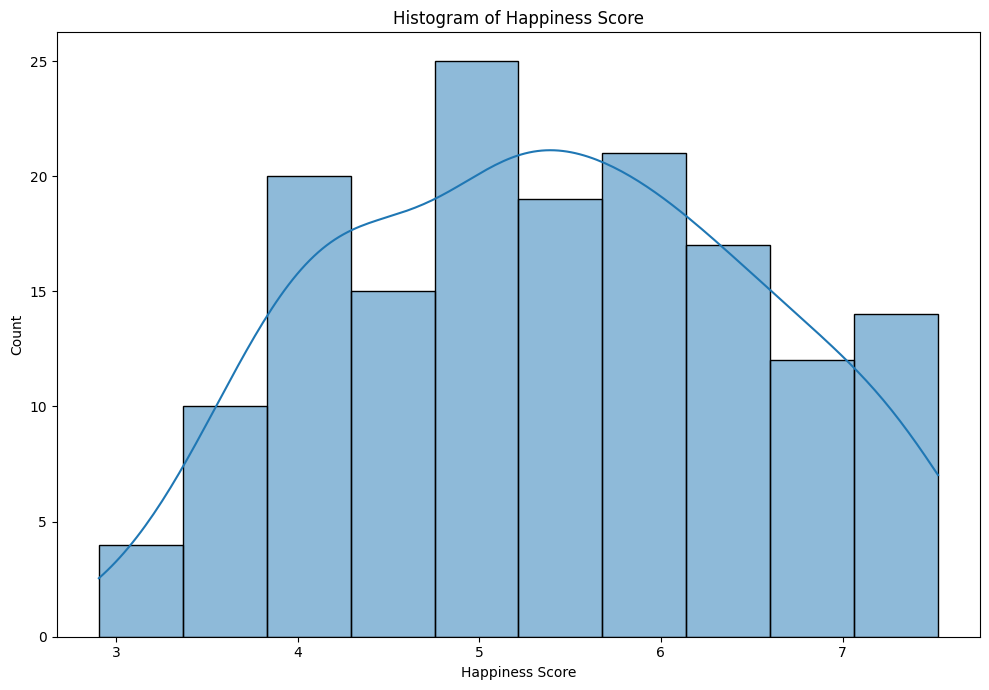

In [298]:
# generate histograms for happiness score
fig1, ax1 = plt.subplots()
sns.histplot(df['Happiness Score'], bins=10, kde=True, ax=ax1)
ax1.set_title('Histogram of Happiness Score')
fig1.tight_layout()

>> #### 2.4.2 Task 2: Barplot of Countries in Region
>> - This allows us to see what categorical groups exist in the Region column, and how many countries belong to each region.


Value Counts for Region:

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


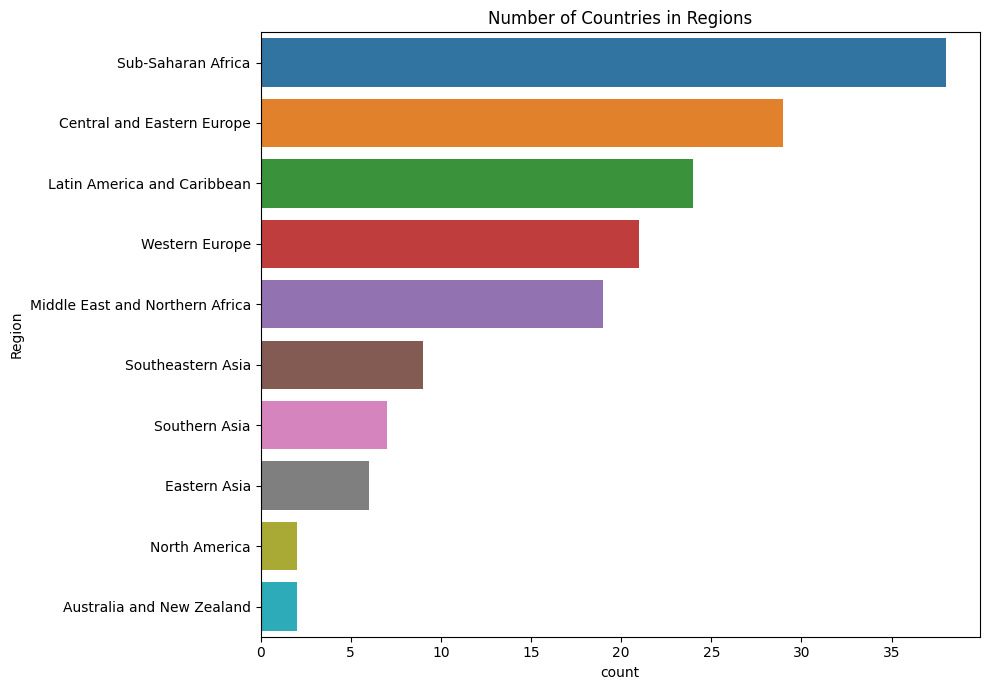

In [299]:
# print value counts for region
print('Value Counts for Region:\n')
print(df['Region'].value_counts())

# generate bar plot for region
fig2, ax2 = plt.subplots()
sns.barplot(x=df['Region'].value_counts(), 
            y=df['Region'].value_counts().index, 
            ax=ax2, 
            hue=df['Region'].value_counts().index)
ax2.set_title('Number of Countries in Regions')
fig2.tight_layout()

## 3 Defining Objectives [3 pts]
- *Form a research question which is interesting to you.*
- *Define a minimum of 3 objectives for the mini-project.*
> ### 3.1 Objective 1
> - objective 1: How does happiness vary across different regions, and what are the primary factors contributing to these regional differences? Can we identify specific combinations of economic, social, and political factors that explain high or low happiness scores in particular regions?
> ### 3.2 Objective 2
> - objective 2: To what extent does economic development (GDP per capita) influence
happiness levels globally, and how does this relationship interact with other factors 
like health and social support? Are there diminishing returns to economic growth in 
terms of happiness?
> ### 3.3 Objective 3
> - objective 3: How do trust in government and perceived freedom influence happiness levels, 
and are these factors more important in certain regions or cultural contexts? Is there a 
link between corruption perception and happiness?

## 4 Present Your Findings [9 pts]
- *Use libraries like numpy and pandas to extract data from the main dataset to forms that help answer the objectives.*
- *Present a minimum of 3 data analysis tasks and accompanying visualizations (one for each question).*
    - *Justification for choice of plot*
    - *Plot (with appropriate details and aesthetics)*
    - *Inference/Conclusion from the visualization*

> ### 4.1 Exploring Objective 1
> - objective 1: How does happiness vary across different regions, and what are the primary factors contributing to these regional differences? Can we identify specific combinations of economic, social, and political factors that explain high or low happiness scores in particular regions?

>> #### 4.1.1 Data Extraction: How does happiness vary across different regions?

In [ ]:
# create new col names
new_col_names = {i:i.lower().replace(' ','_').replace('(','').replace(')','') for i in df.columns}
df.rename(columns=new_col_names, inplace=True)

# create new dataframe(zeros) that have a zero for an observation
zeros = df[(df == 0).any(axis=1)]

# list of countries in zeros dataframe
country_with_zero = zeros.country.unique()

# remove rows with zero values.. use df.loc to avoid SettingWithCopyWarning
df = df[~df.isin(country_with_zero)].dropna()

# sort df by happiness score
df.sort_values(by='happiness_score', inplace=True, ascending=False)

# reset happiness index to account for removing countries
df.happiness_rank = df.happiness_score.rank(method='max', ascending=False)
df.reset_index(drop=True, inplace=True)

# sort by number of countries in each region so color is consistent
# between bar plot and boxplot
df['sort_col'] = df['region'].map(df['region'].value_counts())
df = df.sort_values(by='sort_col', ascending=False).drop('sort_col', axis=1)


>> #### 4.1.2 Visualization: How does happiness vary across different regions?

>>> ##### 4.1.2.1 Justification: How does happiness vary across different regions?
>>> - Distribution of Countries by Region: We want to look at total counts for each unique group in the Region column. A bar plot works well when looking at the frequency of categorical variables.
>>> - Happiness Score by Region: A box plot is a good tool for visualizing the distribution of numerical data for each categorical variable.

>>> ##### 4.1.2.2 Plots: How does happiness vary across different regions?

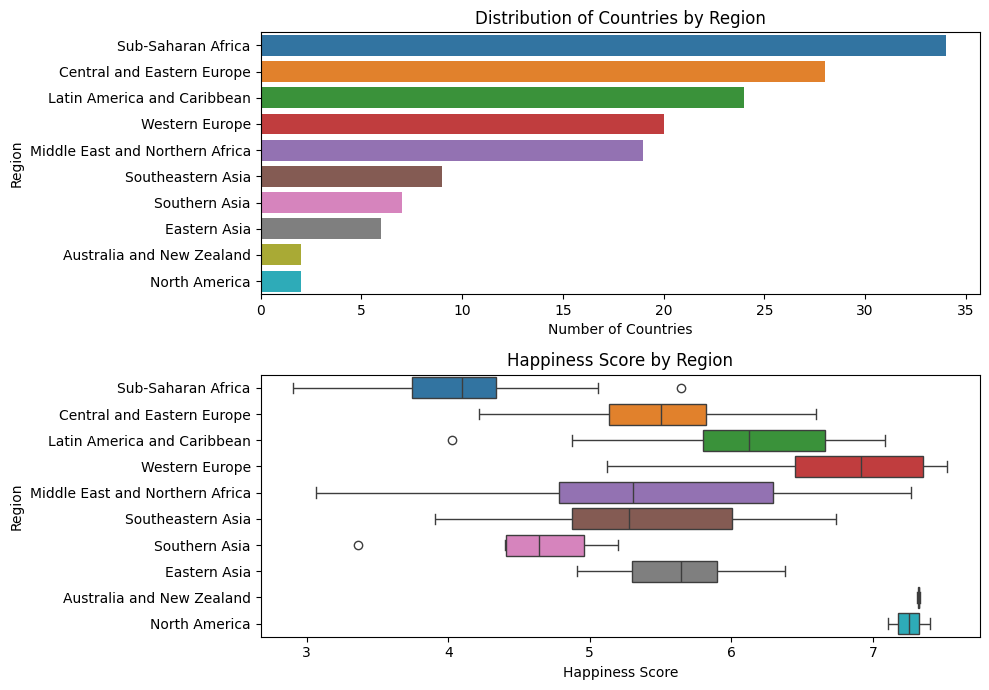

In [301]:
# create figure and axes for subplots
fig1, axes1 = plt.subplots(2,1)
# squish axes1 into 1d array
axes1 = axes1.flatten()
sns.barplot(y=df.region.value_counts().index,x=df.region.value_counts().values,ax=axes1[0],hue=df.region.value_counts().index)
axes1[0].set_ylabel('Region')
axes1[0].set_xlabel('Number of Countries')
axes1[0].set_title('Distribution of Countries by Region')
sns.boxplot(data=df, x='happiness_score', y='region',ax=axes1[1],hue='region',legend=False)
axes1[1].set_ylabel('Region')
axes1[1].set_xlabel('Happiness Score')
axes1[1].set_title('Happiness Score by Region')
fig1.tight_layout()

>> #### 4.1.3 Data Extraction: What are the primary factors contributing to these regional differences?

In [ ]:
# create dataframe for happiness score comparison.. remove country, region and happiness rank columns
happiness_score_comparison = df[['economy_gdp_per_capita','family','health_life_expectancy','freedom','trust_government_corruption','generosity','dystopia_residual']]

def get_happiness_score_corr(comparison_df):
    global_corr_dict={'region':'global'}
    regional_corr_dict ={}
    corr_list = []
    # create global datafram
    for col in comparison_df.columns:
        global_corr_dict[col] = [df.happiness_score.corr(comparison_df[col])]
    df_global_corr = pd.DataFrame.from_dict(global_corr_dict)
    corr_list.append(df_global_corr)
    # create regional dataframes
    for region in df.region.value_counts().index:
        regional_corr_dict['region'] = region
        for col in comparison_df.columns:
            regional_corr_dict[col] = [df.loc[df.region == region,'happiness_score'].corr(comparison_df[col])]
        df_regional_corr = pd.DataFrame.from_dict(regional_corr_dict)
        corr_list.append(df_regional_corr)
    
    df_hs_corr = pd.concat(corr_list)
    return(df_hs_corr)
# get happines score correlation to other numeric variables globally and by region
df_hs_corr = get_happiness_score_corr(happiness_score_comparison)

# drop regions with two points or less as correlation between two points statistically meaningless
# drop Australia and New Zealand and North America 
df_hs_corr = df_hs_corr[~df_hs_corr.isin(['Australia and New Zealand','North America'])].dropna()

# transform dataframe for plotting
df_hs_corr = df_hs_corr.melt(id_vars=['region'],var_name='numeric_variable',value_name='corr_value')


                        region        numeric_variable  corr_value
0                       global  economy_gdp_per_capita    0.803762
1           Sub-Saharan Africa  economy_gdp_per_capita    0.477782
2   Central and Eastern Europe  economy_gdp_per_capita    0.423165
3  Latin America and Caribbean  economy_gdp_per_capita    0.777641
4               Western Europe  economy_gdp_per_capita    0.665706


>>> ##### 4.1.3.1 Justification:  What are the primary factors contributing to these regional differences?
>>> - A bar plot is a good visualization for comparing values for each catagory.

>>> ##### 4.1.3.2 Plots: what are the primary factors contributing to these regional differences?

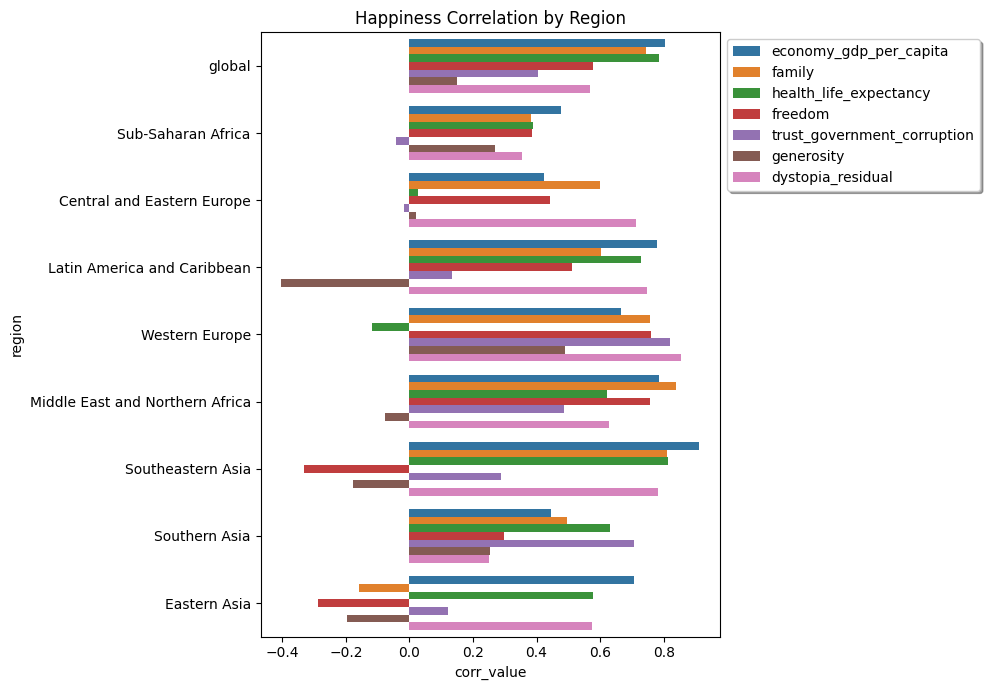

In [ ]:
fig2, axes2 = plt.subplots(1,1)
sns.barplot(data=df_hs_corr,ax=axes2, y='region', x='corr_value', hue='numeric_variable')
axes2.legend( bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
axes2.set_title('Happiness Correlation by Region')
fig2.tight_layout()


>> #### 4.1.4 Inference
>> *How does happiness vary across different regions, and what are the primary factors contributing to these regional differences? Can we identify specific combinations of economic, social, and political factors that explain high or low happiness scores in particular regions?*
>> - The two regions, North America (NA) and Australia and New Zealand (ANZ), have the highest median happiness scores in the dataset. While Sub-Saharan Africa has the lowest median happiness score. The primary factor contributing to these differences is the amount of data in each region. Looking at the plot *Distribution of Countries by Region* we can see that the region Sub-Saharan Africa has the most amount of data and NA, ANZ have the least amount of data.
>> - Ignoring the amount of data available for each region we can make several conclusions. The primary factors that contribute to a higher happiness score globally are: economy and health. Economy is the primary factor in the following regions: Southeastern Asia, Latin America and Caribbean, Eastern Asia, and Sub-Saharan Africa. Southern Asia deviates from this pattern as trust is the primary factor that determines happiness score.



> ### 4.2 Exploring Objective 2
> - objective 2: To what extent does economic development (GDP per capita) influence happiness levels globally, and how does this relationship interact with other factors like health and family? Are there diminishing returns to economic growth in terms of happiness?

>> #### 4.2.1 Data Extraction

In [363]:
# select only gdp economy and happiness score plot 1
df_q2_plot_1 = df.loc[:,['region','happiness_score','economy_gdp_per_capita']]

# select region, gdp economy, family, and health plot two
df_q2_plot_2 = df.loc[:,['region','happiness_score','health_life_expectancy','economy_gdp_per_capita','family']]

# get data for plot3  happiness score vs economy_gdp_per_capita >= 1.45  and  happiness score vs economy_gdp_per_capita < 1.45 
# dataeconomy_gdp_per_capita < 1.45
df_under_thresh = df.query('economy_gdp_per_capita < 1.45')
X1 = df_under_thresh.economy_gdp_per_capita.values.reshape(-1,1)
y1 =df_under_thresh.happiness_score.values
model_1 = LinearRegression().fit(X1, y1)
r_squared_1 = model_1.score(X1, y1)
slope_1 = model_1.coef_[0]
intercept_1 = model_1.intercept_

# dataeconomy_gdp_per_capita >= 1.45
df_over_thresh = df.query('economy_gdp_per_capita >= 1.45')
X2 = df_over_thresh.economy_gdp_per_capita.values.reshape(-1,1)
y2 = df_over_thresh.happiness_score.values
model_2 = LinearRegression().fit(X2, y2)
r_squared_2 = model_2.score(X2, y2)
slope_2 = model_2.coef_[0]
intercept_2 = model_2.intercept_

>> #### 4.2.2 Visualizations
>>> ##### 4.2.2.1 Justification
>>> - We want to look at the relationship between two variables. Therefore, a scatter plot is a great way to identify trends between gdp and other variables.

>>> ##### 4.2.2.2 Plots

False

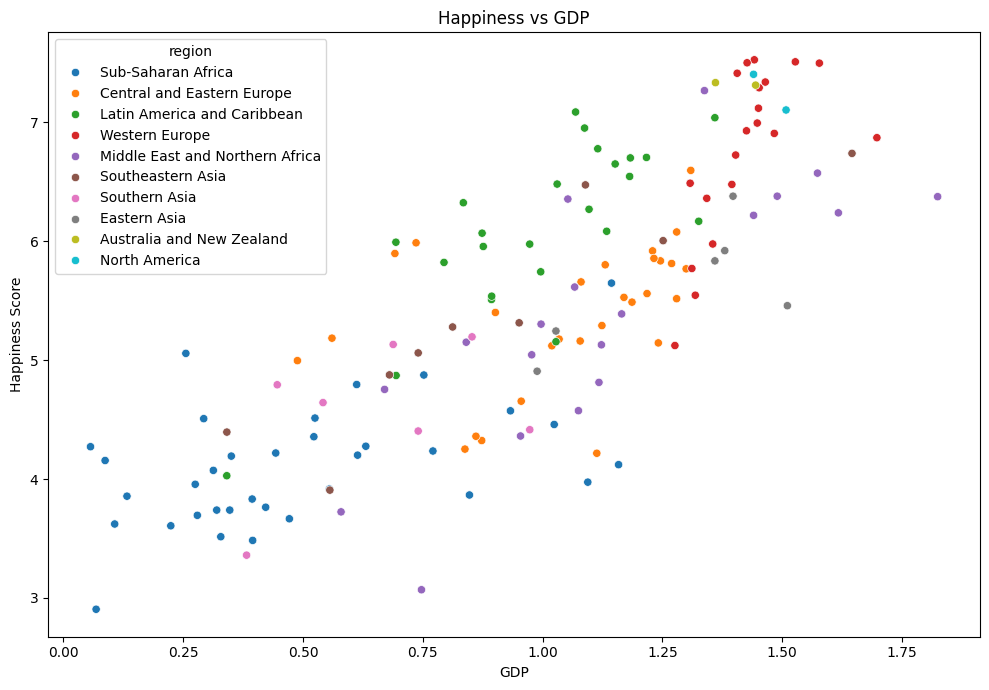

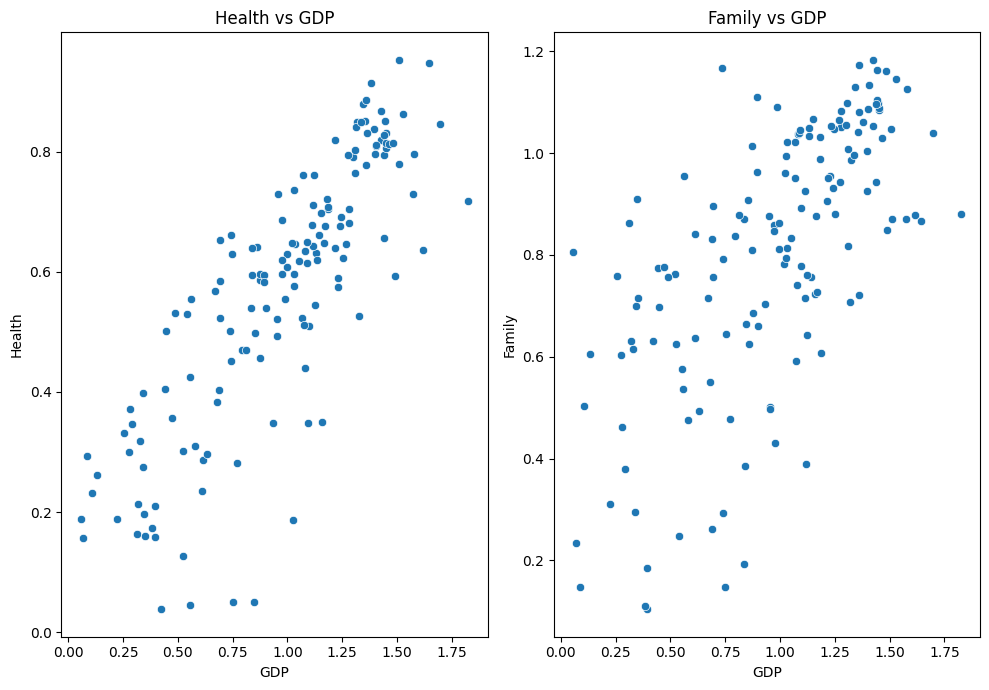

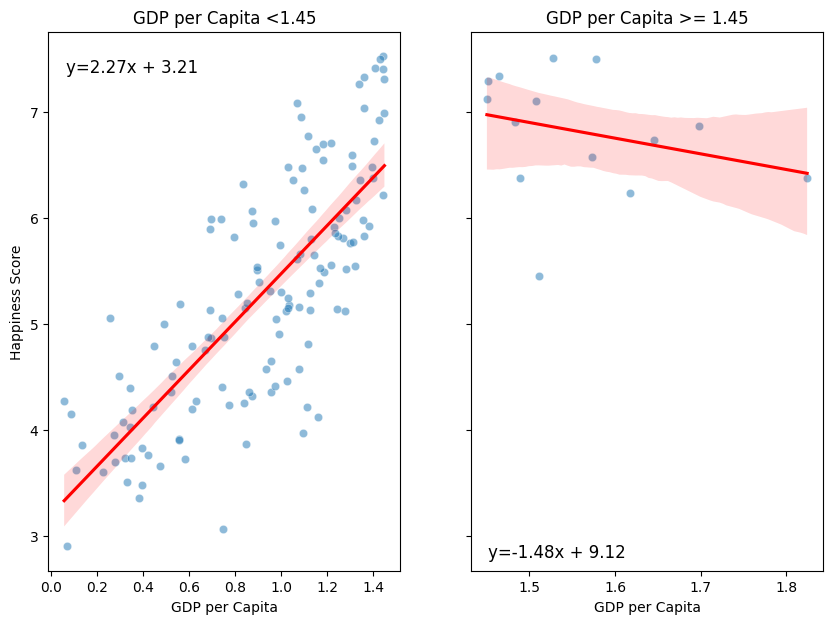

In [373]:
# plot gdp impact on happiness
fig3, axes3 = plt.subplots(1,1)
sns.scatterplot(data=df_q2_plot_1, x='economy_gdp_per_capita', y='happiness_score',hue='region',ax=axes3)
axes3.set_xlabel('GDP')
axes3.set_ylabel('Happiness Score')
axes3.set_title('Happiness vs GDP')
fig3.tight_layout()

# plot 2 gdp impact on health and family
fig4, axes4 = plt.subplots(1,2)
axes4 = axes4.flatten()

# gdp impact on health
sns.scatterplot(data=df_q2_plot_2,x='economy_gdp_per_capita',y='health_life_expectancy',ax=axes4[0])
axes4[0].set_xlabel('GDP')
axes4[0].set_ylabel('Health')
axes4[0].set_title('Health vs GDP')
fig4.tight_layout()

# gdp impact on family
sns.scatterplot(data=df_q2_plot_2,x='economy_gdp_per_capita',y='family',ax=axes4[1])
axes4[1].set_xlabel('GDP')
axes4[1].set_ylabel('Family')
axes4[1].set_title('Family vs GDP')

fig4.tight_layout()

# plot3 gdp impact on happiness score at gdp threshhold of 1.45
fig5, axes5 = plt.subplots(1,2,sharey=True)
axes5 = axes5.flatten()

# Plot GDP per Capita < 1.45 vs. Happiness Score
sns.scatterplot(data=df_under_thresh, x='economy_gdp_per_capita', y='happiness_score', ax=axes5[0], alpha=0.5)
sns.regplot(data=df_under_thresh, x='economy_gdp_per_capita', y='happiness_score', ax=axes5[0], scatter=False, color='red')
axes5[0].text(0.05, 0.95, f'y={slope_1:.2f}x + {intercept_1:.2f}', transform=axes5[0].transAxes, fontsize=12, verticalalignment='top')
axes5[0].set_ylabel("Happiness Score")
axes5[0].set_xlabel("GDP per Capita")
axes5[0].set_title("GDP per Capita <1.45")

# Plot GDP per Capita >= 1.45 vs. Happiness Score
sns.scatterplot(data=df_over_thresh, x='economy_gdp_per_capita', y='happiness_score', ax=axes5[1], alpha=0.5)
sns.regplot(data=df_over_thresh, x='economy_gdp_per_capita', y='happiness_score', ax=axes5[1], scatter=False, color='red')
axes5[1].text(0.05, 0.05, f'y={slope_2:.2f}x + {intercept_2:.2f}', transform=axes5[1].transAxes, fontsize=12, verticalalignment='top')
axes5[1].set_ylabel("Happiness Score")
axes5[1].set_xlabel("GDP per Capita")
axes5[1].set_title("GDP per Capita >= 1.45")

fig5.get_tight_layout()

>> #### 4.2.3 Inference
>> *To what extent does economic development (GDP per capita) influence happiness levels globally, and how does this relationship interact with other factors like health and family? Are there diminishing returns to economic growth in terms of happiness?*
>> - From the first plot we see that there is a positive linear correlation between GDP and happiness score. However the happiness score starts to decrease around a gdp score of 1.45. The second plot shows us that health and family have a  positive linear correlation to GDP. However, the variance for family vs GDP is larger. Therefore, GDP does influence happiness levels, health, and family.

>> - Finally, the third plot shows us that money can only buy so much happiness. At GDP levels above 1.45, the data has a slight negative linear correlation (negative slope), and has diminishing returns in terms of happiness. 


> ### 4.3 Exploring Objective 3
> - objective 3: How do trust in government and perceived freedom influence happiness levels, 
and are these factors more important in certain regions or cultural contexts? Is there a 
link between corruption perception and happiness?

>> #### 4.3.1 Data Extraction

In [377]:
# select only trust_government_corruption, freedom, and happiness score plot 1 and 2
df_q3_plot_1 = df.loc[:,['region','happiness_score','freedom','trust_government_corruption']]

# selcect trust_government_corruption from correlation dataframe
df_q3_plot_2 = df_hs_corr[df_hs_corr['numeric_variable']=='trust_government_corruption'] 

>> #### 4.3.2 Visualizations
>>> ##### 4.3.2.1 Justification
>>> - We want to look at the relationship between two variables. Therefore, a scatter plot is a great way to identify trends between gdp and other variables.
>>> - We want to look at similarities and differences between regions. Therefore, a bar plot will be a great way to visualize correlations between regions.

>>> ##### 4.3.2.2 Plots

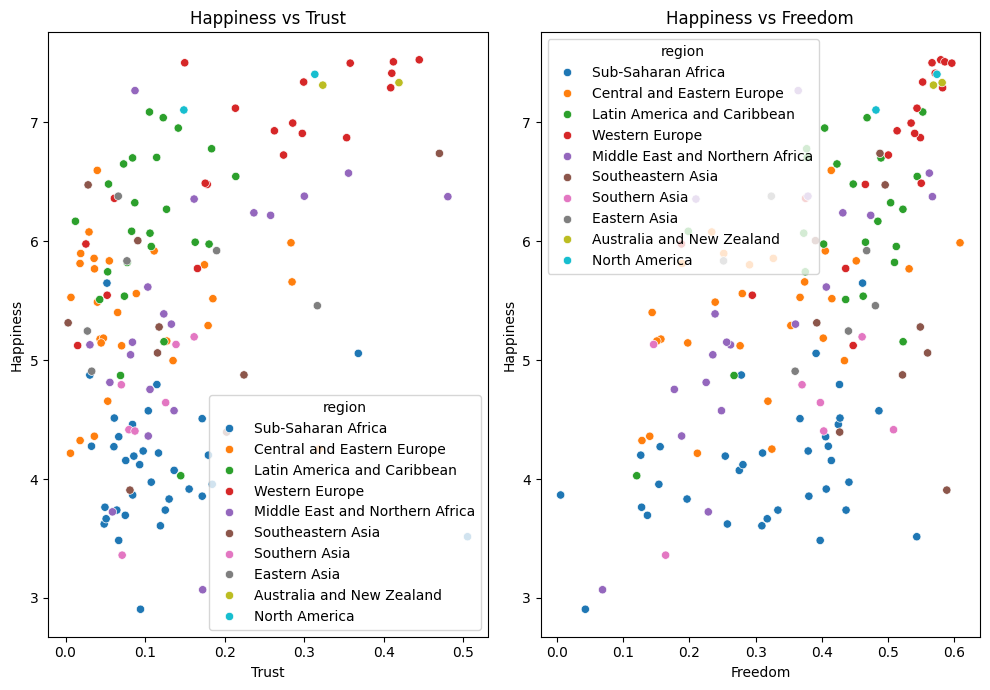

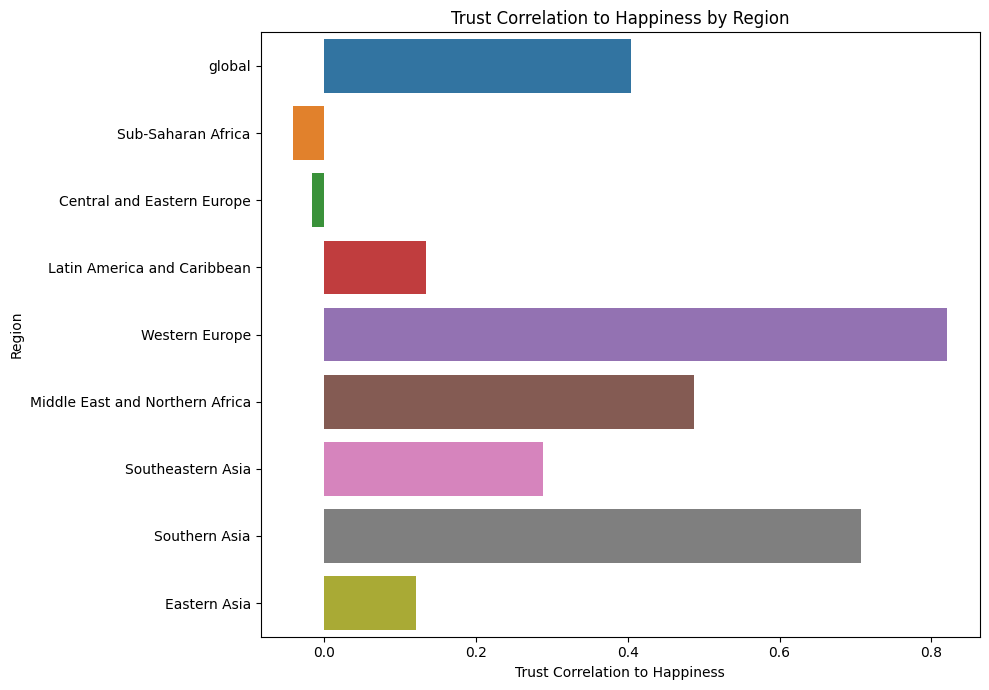

In [383]:
# plot 1: trust vs happiness score and freedom vs happiness score
fig6, axes6 = plt.subplots(1,2)

# trust impact on happiness
sns.scatterplot(data=df_q3_plot_1,x='trust_government_corruption',y='happiness_score',ax=axes6[0],hue='region')
axes6[0].set_xlabel('Trust')
axes6[0].set_ylabel('Happiness')
axes6[0].set_title('Happiness vs Trust')


# freedom impact on happiness
sns.scatterplot(data=df_q3_plot_1,x='freedom',y='happiness_score',ax=axes6[1],hue='region')
axes6[1].set_xlabel('Freedom')
axes6[1].set_ylabel('Happiness')
axes6[1].set_title('Happiness vs Freedom')

fig6.tight_layout()

# plot2: correlation similarities between trust and happiness for different regions 
fig7, axes7 = plt.subplots(1,1)
sns.barplot(data=df_q3_plot_2,x='corr_value',y='region',hue='region',ax=axes7)
axes7.set_xlabel('Trust Correlation to Happiness')
axes7.set_ylabel('Region')
axes7.set_title('Trust Correlation to Happiness by Region')
fig7.tight_layout()


>> #### 4.3.3 Inference
>> *How do trust in government and perceived freedom influence happiness levels, 
and are these factors more important in certain regions or cultural contexts? Is there a 
link between corruption perception and happiness?*
>> - From plot 1 (Happiness vs Trust) we see that trust in government has very little impact on happiness, since a trust level around 0.1 can correspond to a happiness score between roughly 3 and 7. Also from plot 1 (Happiness vs Freedom) we see that freedom has a larger impact on happiness score when compared to trust. However, freedom's impact on happiness appears to have a large variance.

>> - Looking at plot 2 (Trust Correlation to Happiness by Region) we see that trust has significantly different impacts on happiness score when partitioned by region. Western Europe and Southern Asia have the highest correlation between trust and happiness score. While Sub-Saharan Africa and Central and Eastern Europe have only a slight negative correlation between trust and happiness score. 


## 5 Ethics [2 pts]
- *Describe in words, or supporting visualization minimum 1 ethical concern you observe in the dataset.*

> ### 5.1 Ethical Concerns
> - When looking at the different metrics represented in the 2016.csv, several of them raise ethical concern. These metrics are the following: freedom, family, trust in government corruption, and generosity. All of these metrics are inherently subjective, and as a consequence of their subjective nature can not be measured equally across all regions. Perceptions of these metrics and the resulting quantification of them can vary wildly due to cultural differences and socioeconomic standings.
